# **Principal Component Analysis (PCA)**

## Inspecting the dataset

In [1]:
import pandas as pd

file_path = "final_cleaned_oscars.csv"
df = pd.read_csv(file_path)

df.head()

,Year,Category,Film,Film_ID,Nominee,Winner,TMDb_ID,Popularity,Vote_Average,Genres,Director,IMDb_Rating
0,1972,Best Cinematography,1776,tt0068156,"Harry Stradling, Jr.",False,14902,6.8,6.8,"Drama, History, Musical",Peter H. Hunt,7.2
1,2019,Best Cinematography,1917,tt8579674,Roger Deakins,True,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
2,2019,Best Director,1917,tt8579674,Sam Mendes,False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
3,2019,Best Picture,1917,tt8579674,"Sam Mendes, Pippa Harris, Jayne-Ann Tenggren a...",False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
4,2019,Best Original Screenplay,1917,tt8579674,Written by Sam Mendes & Krysty Wilson-Cairns,False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2


 ## Preprocessing the Data for PCA

In [15]:
numeric_cols = ["Winner", "Popularity", "Vote_Average", "IMDb_Rating"]
df_numeric = df[numeric_cols].dropna()

print(df_numeric.head())

df_numeric.to_csv('PCA_preprocessed.csv', index=False)

   Winner  Popularity  Vote_Average  IMDb_Rating
0   False         6.8           6.8          7.2
1    True        46.0           8.0          8.2
2   False        46.0           8.0          8.2
3   False        46.0           8.0          8.2
4   False        46.0           8.0          8.2


## Normalizing the Data using StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

print(df_scaled.head())

df_scaled.to_csv('PCA_normalized.csv', index=False)

     Winner  Popularity  Vote_Average  IMDb_Rating
0 -0.488742   -0.285142     -0.482845    -0.377077
1  2.046069    0.261729      1.323658     1.284869
2 -0.488742    0.261729      1.323658     1.284869
3 -0.488742    0.261729      1.323658     1.284869
4 -0.488742    0.261729      1.323658     1.284869


## Performing PCA with 2 Components

In [17]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA with 2 components

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_scaled)

variance_2d = np.sum(pca_2.explained_variance_ratio_) * 100

print(f"Variance retained in 2D PCA: {variance_2d:.2f}%")

Variance retained in 2D PCA: 75.94%


## Performing PCA with 3 Components

In [18]:
# Perform PCA with 3 components
pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(df_scaled)

variance_3d = np.sum(pca_3.explained_variance_ratio_) * 100
print(f"Variance retained in 3D PCA: {variance_3d:.2f}%")

Variance retained in 3D PCA: 97.34%


## Visualizing the 2D PCA Projection

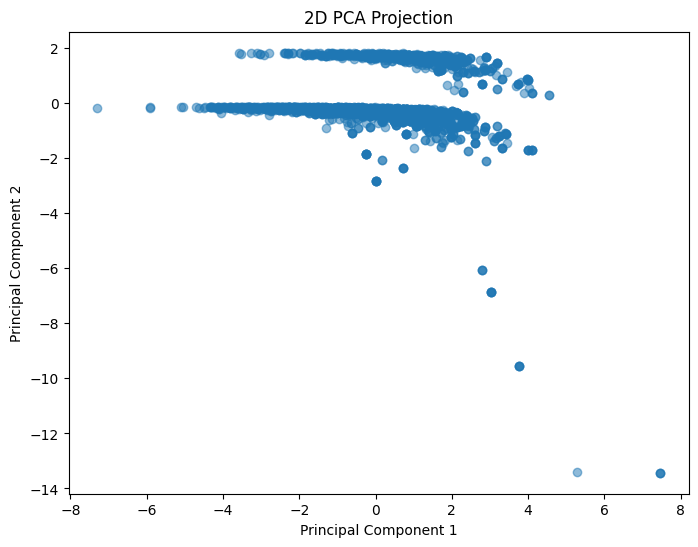

In [19]:
import matplotlib.pyplot as plt

# Scatter plot for 2D PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_2_result[:, 0], pca_2_result[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection")
plt.show()

## Visualizing the 3D PCA Projection

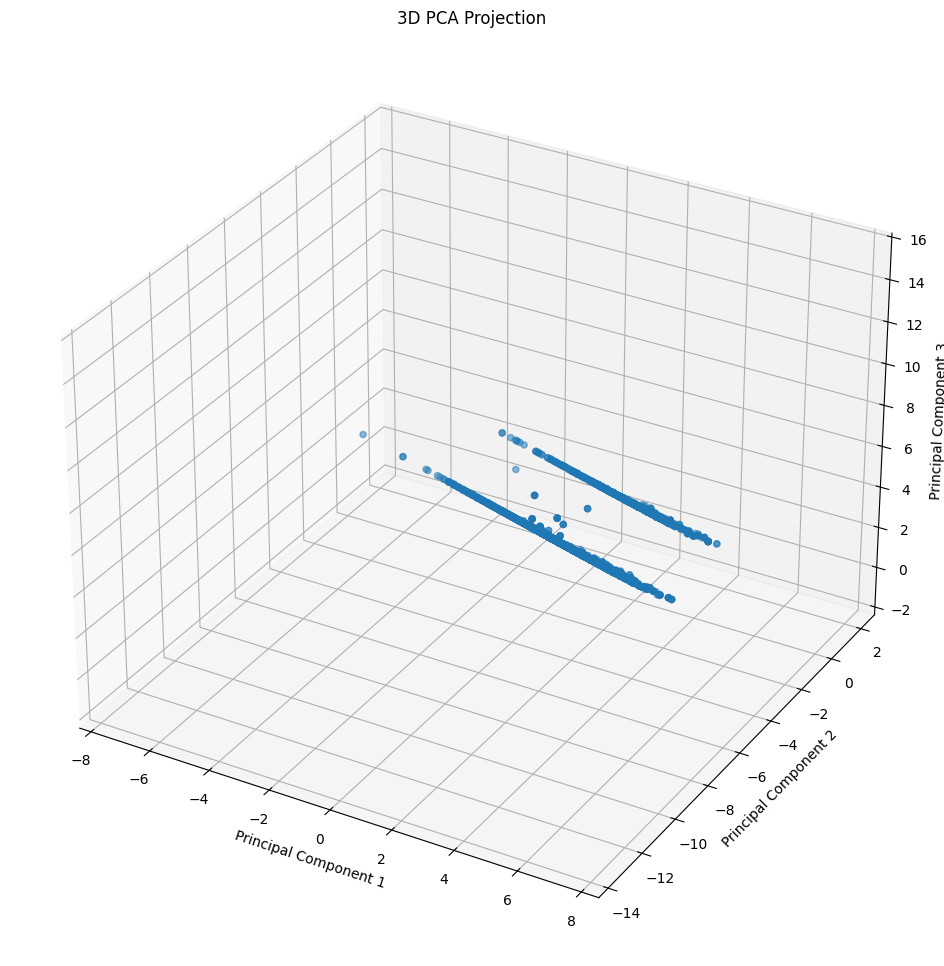

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot for PCA
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3_result[:, 0], pca_3_result[:, 1], pca_3_result[:, 2], alpha=0.5)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection")

plt.savefig("3D_PCA_Projection.png", dpi=300, bbox_inches='tight')

plt.show()

## Number of Components Needed for 95% Variance

In [21]:
pca_full = PCA().fit(df_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed to retain at least 95% variance: {n_components_95}")

Number of components needed to retain at least 95% variance: 3


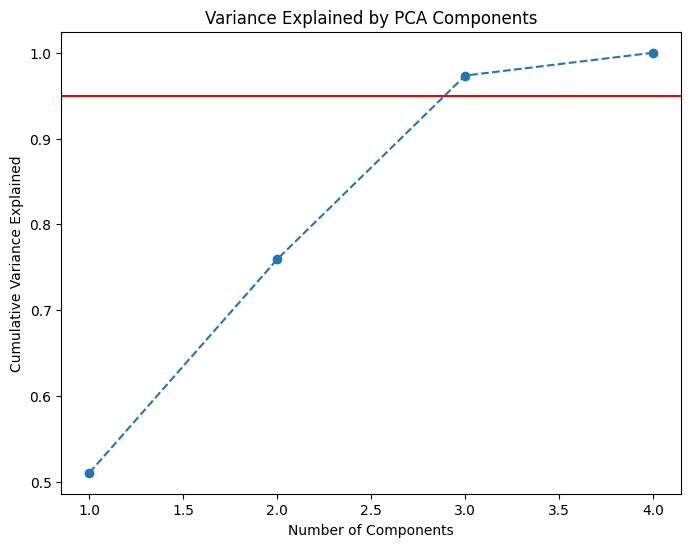

In [10]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Variance Explained by PCA Components")
plt.show()

## Extracting the Top Three Eigenvalues

In [11]:
eigenvalues = pca_full.explained_variance_

top_3_eigenvalues = eigenvalues[:3]

print(f"Top 3 eigenvalues: {top_3_eigenvalues}")

Top 3 eigenvalues: [2.04258412 0.99583467 0.85600857]
